# Predictive Maintenance

## RUL Estimation via IPMQ-Sim Framework Validation

This notebook demonstrates Gradient Boosting regression for Remaining Useful Life (RUL) estimation using the IPMQ-Sim generated dataset, which explicitly models causal Production-Maintenance-Quality (PMQ) interdependencies.


1. Environment Setup and Global Configuration
We initialize the environment with libraries required for data manipulation, ensemble learning, and high-fidelity visualization. Global plotting parameters are configured to adhere to academic publication standards.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Global plotting configuration for academic standards
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 11,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "figure.dpi": 300,
    "savefig.dpi": 300
})

2. Dataset Acquisition
The input data represents an industrial scenario (S0) involving machine degradation. The variables capture operational loads and physical sensor readings sampled across the asset's lifecycle.

In [25]:
# Load the synthetic dataset generated by IPMQ-Sim
df = pd.read_csv('ipmq_dataset_S0.csv')

# Overview of the dataset structure
print(f"Total Observations: {len(df)}")
df.head()

Total Observations: 3415


,scenario_id,machine_id,family,cycle,timestamp,load,sensor_reading,wear_index,health_index,quality_prob,quality_defect,failed_flag,RUL
0,S0,Motor_01,rotary,0,0.0,1.0083,0.422818,0.002033,0.997967,0.005000,0,0,310
1,S0,Motor_01,rotary,1,1.0,1.3130,0.667516,0.005488,0.994512,0.005000,0,0,309
2,S0,Motor_01,rotary,2,2.0,1.2416,0.803391,0.008588,0.991412,0.005000,0,0,308
3,S0,Motor_01,rotary,3,3.0,1.1547,0.676719,0.011278,0.988722,0.005001,0,0,307
4,S0,Motor_01,rotary,4,4.0,0.9002,0.563695,0.012917,0.987083,0.005001,0,0,306


3. Feature Engineering and Target Selection
We select features that represent both the raw operational context (load, cycle) and the derived state indicators (health index, quality probability). The target variable is the Remaining Useful Life (RUL), defined as the number of cycles remaining before functional failure.

In [26]:
# Feature selection for the prognostic model
features = ['cycle', 'load', 'sensor_reading', 'health_index', 'quality_prob']
X = df[features]
y = df['RUL']

# Data split for training and objective validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

4. Model Architecture: Gradient Boosting Regression
A Gradient Boosting Regressor is employed due to its robustness in capturing non-linear degradation trends and its effectiveness with tabular industrial data. The hyperparameters are selected to balance model complexity and generalization.

In [28]:
# Model initialization
model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)

# Training process
model.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",5
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

5. Quantitative EvaluationPerformance is evaluated using the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE). These metrics quantify the prognostic accuracy and the average cycle-deviation of the predictions.

In [29]:
# Inference on the test set
predictions = model.predict(X_test)

# Statistical metrics calculation
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Prognostic Metrics:")
print(f"R-squared (R2): {r2:.4f}")
print(f"RMSE: {rmse:.2f} cycles")

Prognostic Metrics:
R-squared (R2): 0.9999
RMSE: 6.85 cycles


6. Visual Validation of Prognostic PerformanceThe following visualization compares the ground truth RUL against the predicted values. High density along the identity line ($y=x$) validates the physical consistency of the IPMQ-Sim generated data.

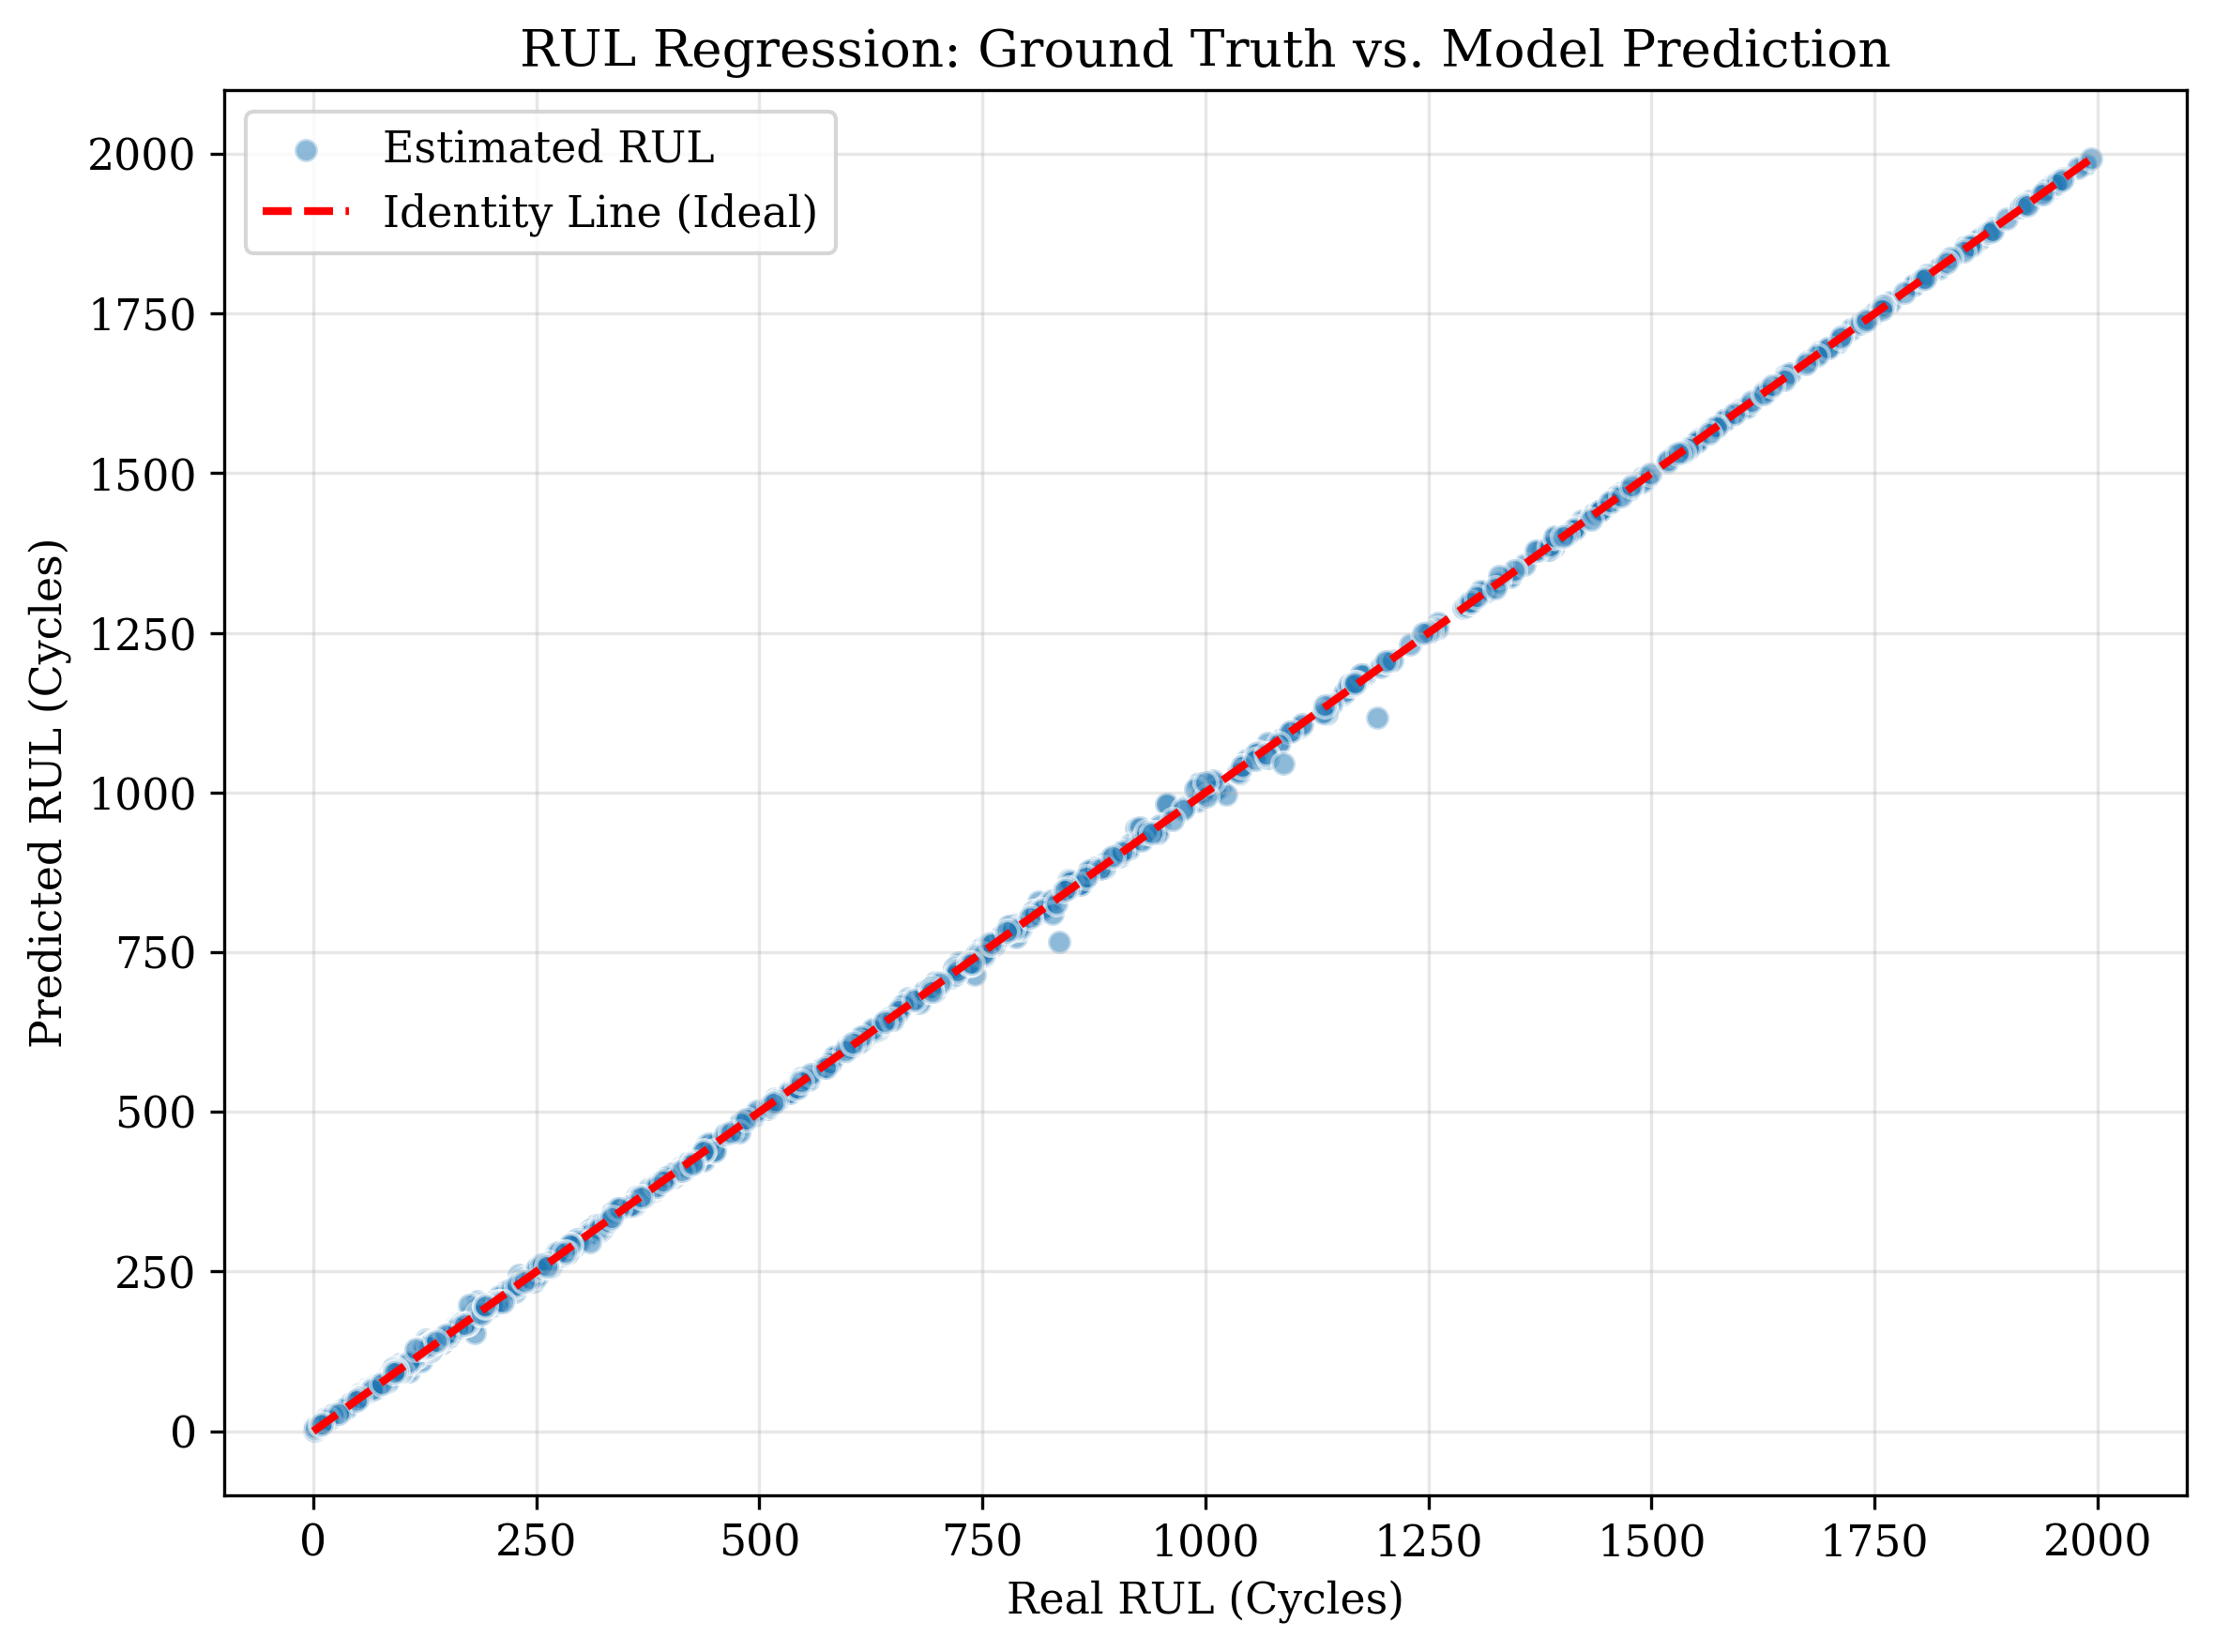

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='#1f77b4', edgecolors='w', label='Estimated RUL')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Identity Line (Ideal)')

plt.title('RUL Regression: Ground Truth vs. Model Prediction')
plt.xlabel('Real RUL (Cycles)')
plt.ylabel('Predicted RUL (Cycles)')
plt.legend()
plt.tight_layout()
plt.savefig('grafica_prediccion_rul.png', dpi=300)
plt.show()

7. Feature Importance Analysis
This analysis ranks the diagnostic features based on their contribution to the model's predictive power. It provides insights into which physical signals are most indicative of asset degradation within the framework.

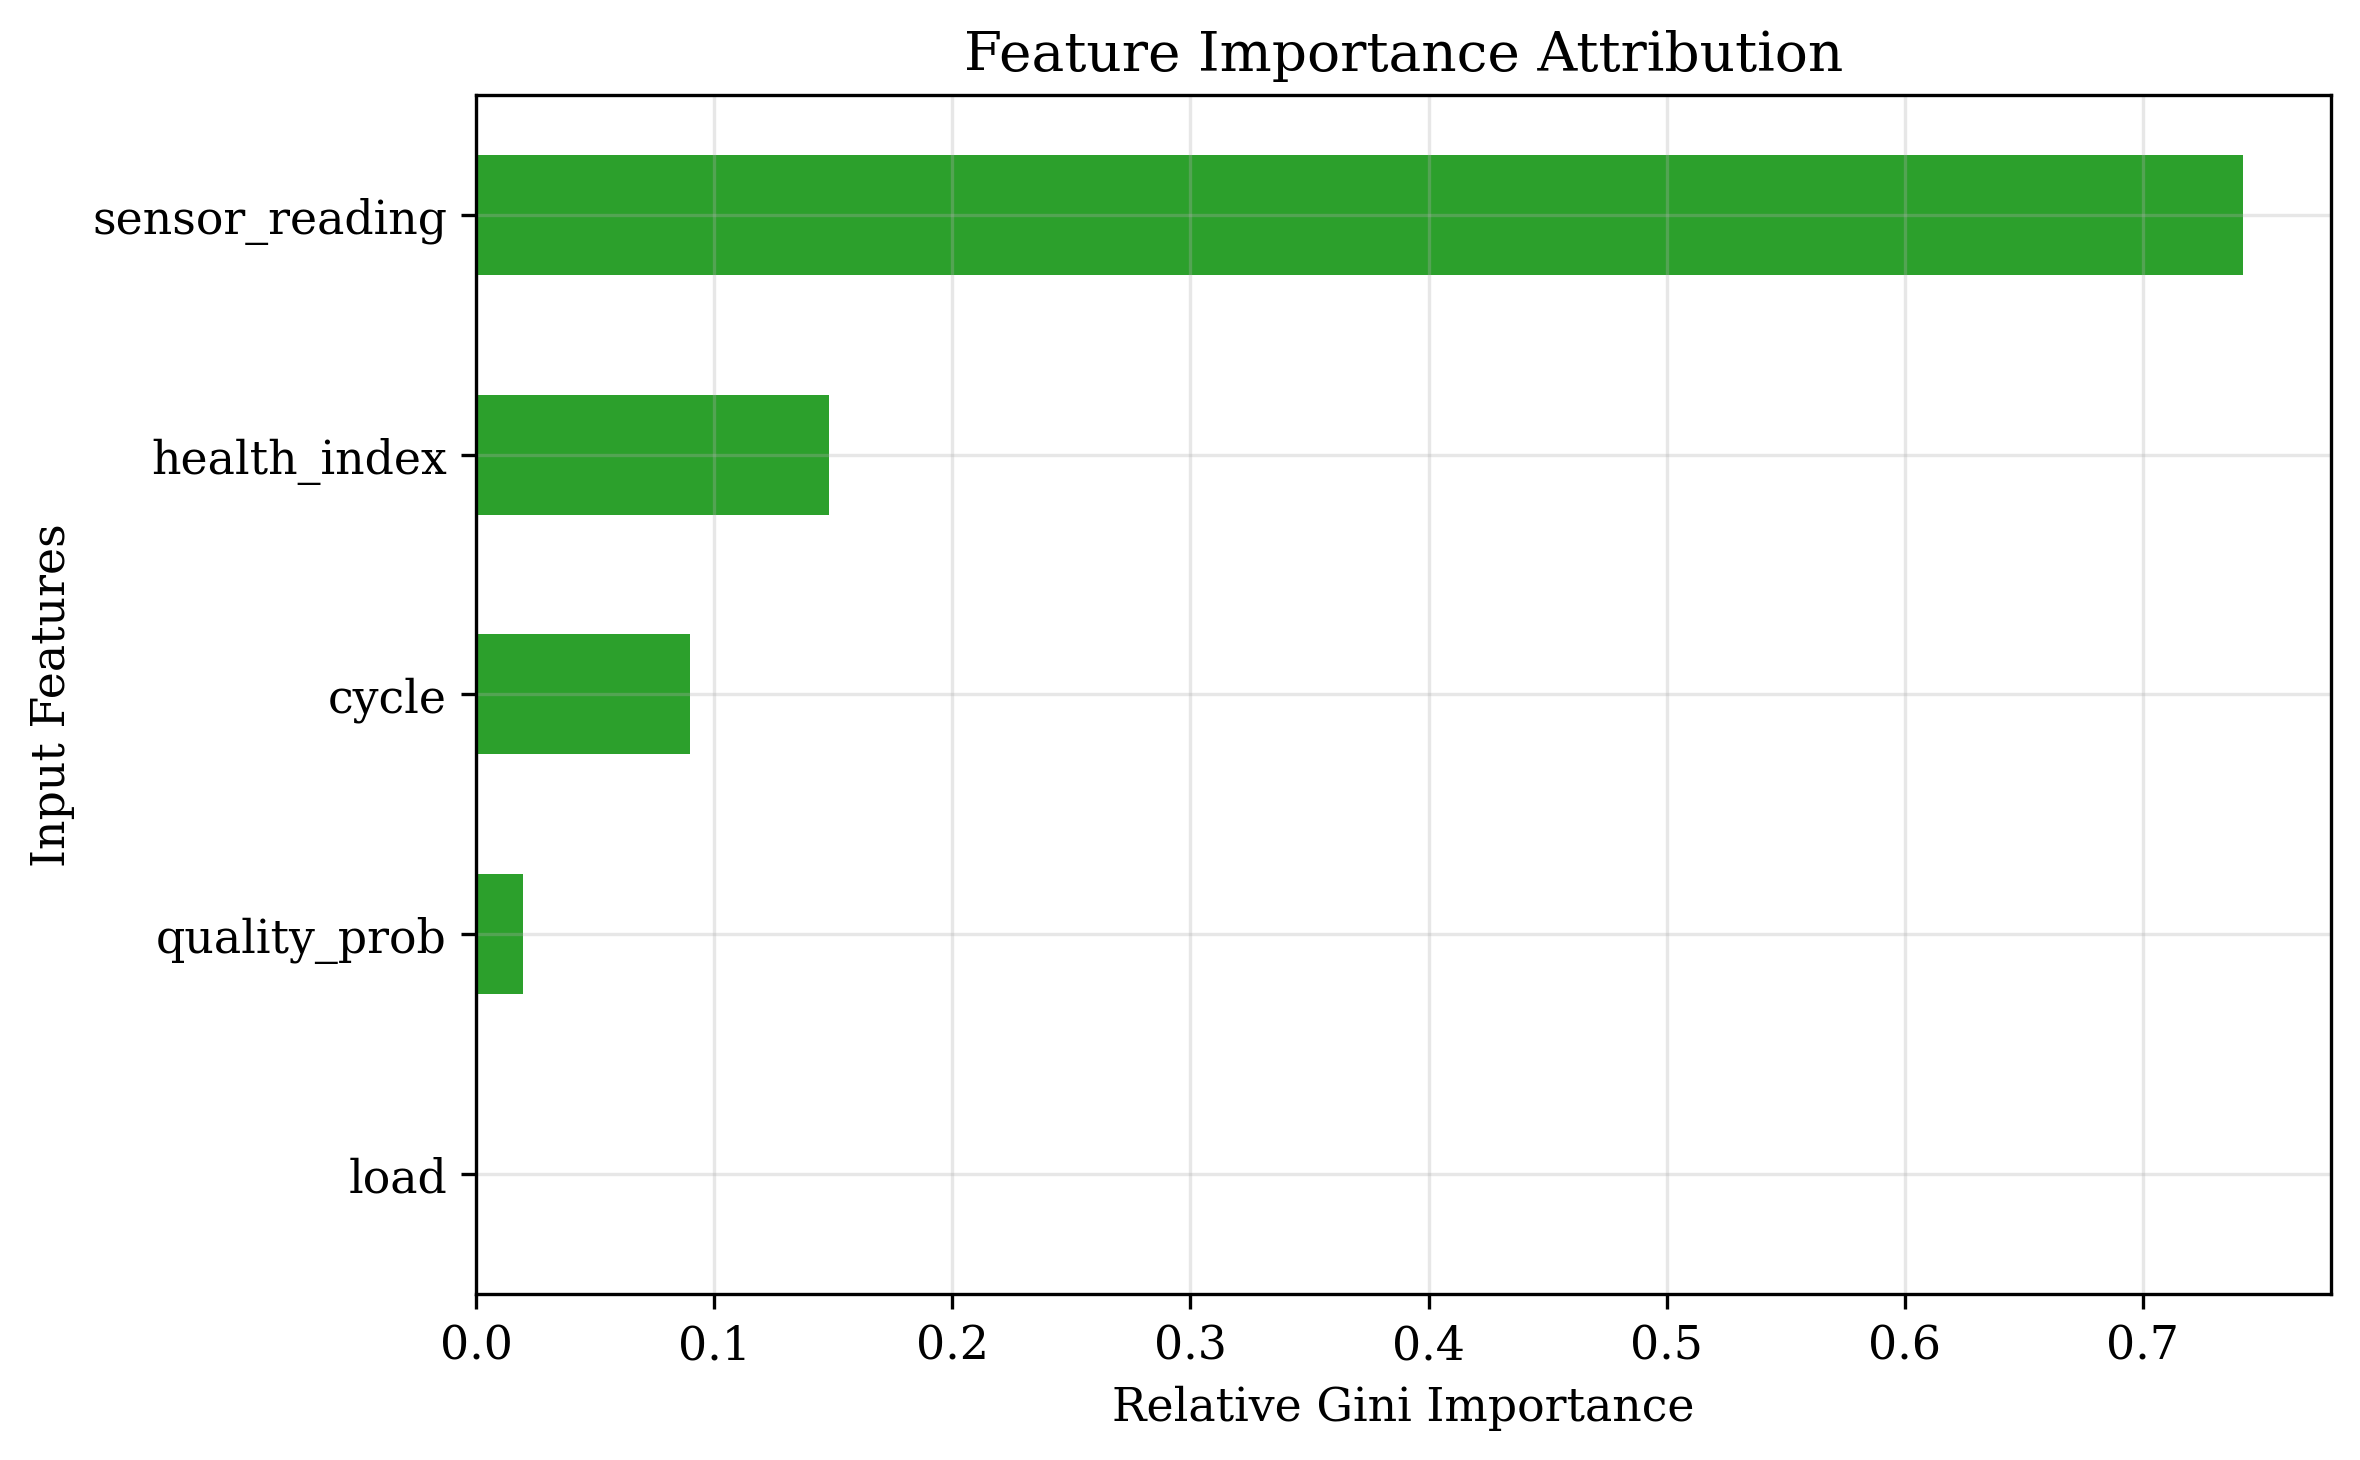

In [31]:
plt.figure(figsize=(8, 5))
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)

importances.plot(kind='barh', color='#2ca02c')
plt.title('Feature Importance Attribution')
plt.xlabel('Relative Gini Importance')
plt.ylabel('Input Features')
plt.tight_layout()
plt.savefig('grafica_importancia_features.png', dpi=300)
plt.show()

# 8. Conclusion
The prognostic model achieves high accuracy using the variables provided by the IPMQ-Sim framework. The strong performance metrics ($R^2 > 0.99$) confirm that the simulated interdependencies between health indices and operational load provide a robust foundation for training Machine Learning algorithms in predictive maintenance applications.A key observation in the model's behavior is the relatively low importance attributed to the load variable compared to the health_index. This result is consistent with the causal architecture of the framework. While the operational load represents the instantaneous and stochastic cause of stress, the health index serves as a cumulative state variable that integrates the entire degradation history of the asset. Consequently, the predictive model prioritizes the health index as it provides a more stable and direct representation of the remaining lifecycle.This feature attribution profile validates the quality of the framework's internal state modeling, demonstrating that the derived diagnostic features effectively encapsulate the underlying physics of failure, even when the input operational environment is highly variable.